# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", None)

# Read Data

In [ ]:
df = pd.read_csv("Combined_Tiktok_Comments.csv")
df.head(3)

,videoWebUrl,submittedVideoUrl,input,cid,createTime,createTimeISO,text,diggCount,likedByAuthor,pinnedByAuthor,repliesToId,replyCommentTotal,uid,uniqueId,avatarThumbnail,mentions,detailedMentions
0,https://www.tiktok.com/@userrr071096/video/7544270209222200582,https://vt.tiktok.com/ZSDGsMDcQ/,https://vt.tiktok.com/ZSDGsMDcQ/,7544369300300595986,1756560366,2025-08-30T13:26:06.000Z,Makasar butuh 1 hari masuk DPR😈\nBandung butuh 2 hari masuk DPR👹\nCirebon cuma 2 jam masuk DPR☠️,6103,True,False,NaN,102,7516873474200454152,l.galang146,https://p16-common-sign.tiktokcdn-us.com/tos-alisg-avt-0068/9e953b39d4395144be2e72ebb6de1cc5~tplv-tiktokx-cropcenter:100:100.jpg?dr=9640&refresh_token=f31c03bb&x-expires=1759564800&x-signature=XCmTbIkIaHtveJKofgVG71%2FHZ3o%3D&t=4d5b0474&ps=13740610&shp=30310797&shcp=ff37627b&idc=useast5,[],[]
1,https://www.tiktok.com/@userrr071096/video/7544270209222200582,https://vt.tiktok.com/ZSDGsMDcQ/,https://vt.tiktok.com/ZSDGsMDcQ/,7544336068322083592,1756552628,2025-08-30T11:17:08.000Z,datangin puan,233,False,False,NaN,1,7295348079682520070,ucuprevan,https://p16-common-sign.tiktokcdn-us.com/tos-maliva-avt-0068/7336703053218086918~tplv-tiktokx-cropcenter:100:100.jpg?dr=9640&refresh_token=2ca3ce88&x-expires=1759564800&x-signature=5xIpJzoIG3kaiZ%2FHIe4ye2xHMKQ%3D&t=4d5b0474&ps=13740610&shp=30310797&shcp=ff37627b&idc=useast5,[],[]
2,https://www.tiktok.com/@userrr071096/video/7544270209222200582,https://vt.tiktok.com/ZSDGsMDcQ/,https://vt.tiktok.com/ZSDGsMDcQ/,7544355059519144711,1756557053,2025-08-30T12:30:53.000Z,bantu up teman',374,False,False,NaN,3,7308560333424395270,emiaasli,https://p16-common-sign.tiktokcdn-us.com/tos-alisg-avt-0068/b56129c23ab262cf36ad9c61cc9a05c7~tplv-tiktokx-cropcenter:100:100.jpg?dr=9640&refresh_token=be47b00b&x-expires=1759564800&x-signature=ouS%2B8w%2BgN0NRSdMVceglzemMomw%3D&t=4d5b0474&ps=13740610&shp=30310797&shcp=ff37627b&idc=useast5,[],[]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10325 entries, 0 to 10324
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   videoWebUrl        10325 non-null  object 
 1   submittedVideoUrl  10325 non-null  object 
 2   input              10325 non-null  object 
 3   cid                10325 non-null  int64  
 4   createTime         10325 non-null  int64  
 5   createTimeISO      10325 non-null  object 
 6   text               10062 non-null  object 
 7   diggCount          10325 non-null  int64  
 8   likedByAuthor      10325 non-null  bool   
 9   pinnedByAuthor     10325 non-null  bool   
 10  repliesToId        0 non-null      float64
 11  replyCommentTotal  10325 non-null  int64  
 12  uid                10325 non-null  int64  
 13  uniqueId           10325 non-null  object 
 14  avatarThumbnail    10325 non-null  object 
 15  mentions           10325 non-null  object 
 16  detailedMentions   103

# Null Handling

In [ ]:
null_percentages = df.isnull().mean() * 100
display(null_percentages)

,0
videoWebUrl,0.000000
submittedVideoUrl,0.000000
input,0.000000
cid,0.000000
createTime,0.000000
createTimeISO,0.000000
text,2.547215
diggCount,0.000000
likedByAuthor,0.000000
pinnedByAuthor,0.000000


Drop `repliesToId` column as it is unusable, containing 100% null values.

In [ ]:
df_dropped = df.drop('repliesToId', axis=1)

null_percentages = df_dropped.isnull().mean() * 100
display(null_percentages)

,0
videoWebUrl,0.000000
submittedVideoUrl,0.000000
input,0.000000
cid,0.000000
createTime,0.000000
createTimeISO,0.000000
text,2.547215
diggCount,0.000000
likedByAuthor,0.000000
pinnedByAuthor,0.000000


In [ ]:
print(len(df_dropped[df_dropped['text'].isnull()]), "comments missing")

263 comments missing


2.54% (263) comment data is missing from the dataset.

In [ ]:
null_text_rows = df_dropped[df_dropped['text'].isnull()]
null_text_rows.head(10)

,videoWebUrl,submittedVideoUrl,input,cid,createTime,createTimeISO,text,diggCount,likedByAuthor,pinnedByAuthor,replyCommentTotal,uid,uniqueId,avatarThumbnail,mentions,detailedMentions
336,https://www.tiktok.com/@userrr071096/video/7544270209222200582,https://vt.tiktok.com/ZSDGsMDcQ/,https://vt.tiktok.com/ZSDGsMDcQ/,7547736861088842513,1757344446,2025-09-08T15:14:06.000Z,NaN,0,False,False,0,6999057331368150021,billal.hossain503,https://p16-common-sign.tiktokcdn-us.com/tos-alisg-avt-0068/7262329708518309889~tplv-tiktokx-cropcenter:100:100.jpg?dr=9640&refresh_token=2727b07d&x-expires=1759564800&x-signature=xGViQ7dvtSbHRu51YeL8QoczYr8%3D&t=4d5b0474&ps=13740610&shp=30310797&shcp=ff37627b&idc=useast5,[],[]
635,https://www.tiktok.com/@userrr071096/video/7544270209222200582,https://vt.tiktok.com/ZSDGsMDcQ/,https://vt.tiktok.com/ZSDGsMDcQ/,7554121917235675911,1758831083,2025-09-25T20:11:23.000Z,NaN,0,False,False,0,7420561110321251333,zulkarnain.alhars,https://p16-common-sign.tiktokcdn-us.com/tos-maliva-avt-0068/413039e0fbcbb3877f4b99540e723f03~tplv-tiktokx-cropcenter:100:100.jpg?dr=9640&refresh_token=977740d7&x-expires=1759564800&x-signature=GiMdb3WzjfAAgv0FidLItIXKSFo%3D&t=4d5b0474&ps=13740610&shp=30310797&shcp=ff37627b&idc=useast5,[],[]
1001,https://www.tiktok.com/@kompascom/video/7543649682736549141,https://vt.tiktok.com/ZSDETKDro/,https://vt.tiktok.com/ZSDETKDro/,7543651783794754311,1756393307,2025-08-28T15:01:47.000Z,NaN,421,False,False,16,6877540488477295617,zaneuraaa,https://p16-sign-sg.tiktokcdn.com/tos-alisg-avt-0068/1bcc31bab16272f196e71b23f73a86e8~tplv-tiktokx-cropcenter:100:100.jpg?dr=10399&refresh_token=5b7fcf9e&x-expires=1759590000&x-signature=QyQi%2BLqljEMCuY7PYwE6SXUNq8w%3D&t=4d5b0474&ps=13740610&shp=30310797&shcp=ff37627b&idc=no1a,[],[]
1003,https://www.tiktok.com/@kompascom/video/7543649682736549141,https://vt.tiktok.com/ZSDETKDro/,https://vt.tiktok.com/ZSDETKDro/,7543652422913229585,1756393455,2025-08-28T15:04:15.000Z,NaN,90,False,False,3,7430086023051658246,ikyydoank07,https://p16-sign-sg.tiktokcdn.com/tos-alisg-avt-0068/6d1677dc74cbbc0cc3cc0178ae119cd1~tplv-tiktokx-cropcenter:100:100.jpg?dr=10399&refresh_token=62d806fc&x-expires=1759590000&x-signature=Yui7k%2FXx2F2rGY4c71Hgo3OJO6k%3D&t=4d5b0474&ps=13740610&shp=30310797&shcp=ff37627b&idc=no1a,[],[]
1028,https://www.tiktok.com/@kompascom/video/7543649682736549141,https://vt.tiktok.com/ZSDETKDro/,https://vt.tiktok.com/ZSDETKDro/,7543651539468387090,1756393252,2025-08-28T15:00:52.000Z,NaN,1180,False,False,17,7190521297548821530,irsa_rezaldi01,https://p16-common-sign.tiktokcdn-us.com/tos-alisg-avt-0068/76d5324d9eed4ec4c43d8fdd59c77f0b~tplv-tiktokx-cropcenter:100:100.jpg?dr=9640&refresh_token=47d0bfae&x-expires=1759590000&x-signature=lsIWHtaO1SlKFQbuKUHUF%2B4X7CY%3D&t=4d5b0474&ps=13740610&shp=30310797&shcp=ff37627b&idc=useast5,[],[]
1049,https://www.tiktok.com/@kompascom/video/7543649682736549141,https://vt.tiktok.com/ZSDETKDro/,https://vt.tiktok.com/ZSDETKDro/,7543755438930051860,1756417461,2025-08-28T21:44:21.000Z,NaN,5,False,False,0,7442157658285081655,yohanes07y,https://p16-common-sign.tiktokcdn-us.com/tos-alisg-avt-0068/015181013ed0fec944499cb8ed08e9c6~tplv-tiktokx-cropcenter:100:100.jpg?dr=9640&refresh_token=e5b2e02f&x-expires=1759590000&x-signature=3N9MLzyo505ZyiDhUACdzPOxQkQ%3D&t=4d5b0474&ps=13740610&shp=30310797&shcp=ff37627b&idc=useast5,[],[]
1053,https://www.tiktok.com/@kompascom/video/7543649682736549141,https://vt.tiktok.com/ZSDETKDro/,https://vt.tiktok.com/ZSDETKDro/,7543653324797625096,1756393663,2025-08-28T15:07:43.000Z,NaN,14,False,False,0,6808447573143487489,rans_bluu,https://p16-common-sign.tiktokcdn-us.com/tos-alisg-avt-0068/ae2743f1d1d3ffe0ebcdba0566286673~tplv-tiktokx-cropcenter:100:100.jpg?dr=9640&refresh_token=2fbf447d&x-expires=1759590000&x-signature=T24W2ts23o1Bd41oLvE53hScC%2F0%3D&t=4d5b0474&ps=13740610&shp=30310797&shcp=ff37627b&idc=useast5,[],[]
1054,https://www.tiktok.com/@kompascom/video/7543649682736549141,https://vt.tiktok.com/ZSDETKDro/,h

As 2.56% data is not significant towards the overall dataset, we can drop the rows that have null values in it.

In [ ]:
df_dropnan = df_dropped.dropna(subset=["text"])

null_percentages = df_dropnan.isnull().mean() * 100
display(null_percentages)

,0
videoWebUrl,0.0
submittedVideoUrl,0.0
input,0.0
cid,0.0
createTime,0.0
createTimeISO,0.0
text,0.0
diggCount,0.0
likedByAuthor,0.0
pinnedByAuthor,0.0


Now all data is clean from null values.

# Subset Useful Columns

In [ ]:
columns_used = ["input", "createTimeISO", "createTime", "text", "uniqueId", "diggCount", "replyCommentTotal"]
df_used = df_dropnan[columns_used].copy()
df_used.head()

,input,createTimeISO,createTime,text,uniqueId,diggCount,replyCommentTotal
0,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T13:26:06.000Z,1756560366,Makasar butuh 1 hari masuk DPR😈\nBandung butuh 2 hari masuk DPR👹\nCirebon cuma 2 jam masuk DPR☠️,l.galang146,6103,102
1,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T11:17:08.000Z,1756552628,datangin puan,ucuprevan,233,1
2,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T12:30:53.000Z,1756557053,bantu up teman',emiaasli,374,3
3,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T11:37:26.000Z,1756553846,jangan dibakar😭 jgn dirusak kak. diperbaikinya nnt pake uang rakyat juga.,liezjameelahamzah,1510,22
4,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T09:31:47.000Z,1756546307,"DPR ny gak kerja,kasus Vina aja gak bisa di bantu",makichen06,1047,1


# EDA

Check for account that commented several times in the same video.

In [ ]:
df_used.groupby(["uniqueId", "input"]) \
  .size() \
  .reset_index(name="count") \
  .sort_values(by="count", ascending=False) \
  .head(10)

,uniqueId,input,count
1656,bg.bon.aceh,https://vt.tiktok.com/ZSDGsMDcQ/,4
7530,rysmansedulur,https://vt.tiktok.com/ZSDETKDro/,4
7449,royaltriptravel,https://vt.tiktok.com/ZSDETKDro/,4
2253,croket81,https://vt.tiktok.com/ZSDpxqyeS/,4
1288,ati.mani0,https://vt.tiktok.com/ZSDGsMDcQ/,4
908,andi.aco007,https://vt.tiktok.com/ZSDGsMDcQ/,3
934,andre.willy0,https://vt.tiktok.com/ZSDETKDro/,3
7160,reressadityawinara,https://vt.tiktok.com/ZSDETKDro/,3
6243,nok.ardiansah111111,https://vt.tiktok.com/ZSDGsMDcQ/,3
9641,yeyecantik74,https://vt.tiktok.com/ZSDETKDro/,3


Preview the comments of the highest comment frequency accounts found.

In [ ]:
df_used[df_used["uniqueId"] == "royaltriptravel"]["text"].head()

,text
1278,"CEPET KASIH TIKTOK BINTANG 1 BIAR DINOTICE SAMA CEO TIKTOK LALU DICEK REGIONNYA , KALO DARI INDONESIA BAKAL DITANYAIN LANGSUNG KOMDIGI NYA OLEH TIKTOK ‼️t"
1399,"CEPET KASIH TIKTOK BINTANG 1 BIAR DINOTICE SAMA CEO TIKTOK LALU DICEK REGIONNYA , KALO DARI INDONESIA BAKAL DITANYAIN LANGSUNG KOMDIGI NYA OLEH TIKTOK ‼️r"
1466,"CEPET KASIH TIKTOK BINTANG 1 BIAR DINOTICE SAMA CEO TIKTOK LALU DICEK REGIONNYA , KALO DARI INDONESIA BAKAL DITANYAIN LANGSUNG KOMDIGI NYA OLEH TIKTOK ‼️t"
1493,"CEPET KASIH TIKTOK BINTANG 1 BIAR DINOTICE SAMA CEO TIKTOK LALU DICEK REGIONNYA , KALO DARI INDONESIA BAKAL DITANYAIN LANGSUNG KOMDIGI NYA OLEH TIKTOK ‼️y"
7531,DI BANTU POSTING ULANG YA!


There are 4 identical comments from "royaltriptravel" accounts. This account can be potentially a buzzer.

In [ ]:
df_used[df_used["uniqueId"] == "yeyecantik74"]["text"].head()

,text
1500,😁
1503,😅
1940,🥰


"yeyecantik74" account comments contain only emojis, this is an outlier and can be removed in our text preprocessing.

In [ ]:
print(len(df_used[df_used["text"].str.contains("tolong notice ini", case=False, na=False)]), "COMMENTS FOUND!")
df_used[df_used["text"].str.contains("tolong notice ini", case=False, na=False)].head()

88 COMMENTS FOUND!


,input,createTimeISO,createTime,text,uniqueId,diggCount,replyCommentTotal
1180,https://vt.tiktok.com/ZSDETKDro/,2025-08-29T13:22:34.000Z,1756473754,"TOLONG NOTICE INI‼️JANGAN JADIIN PELABUHAN, BANDARA, STASIUN, DAN RUMAH SAKIT JADI SASARAN DEMO!!!!\nObjek-objek vital ini kalau rusak bikin ekonomi kita ambruk, jadi masyarakat cerdas untuk gak terprovokasi buat demo ke objek-objek vital ini! Yang susah pada akhirnya kita lagi kita lagi!\nTETAP WARAS DAN FOKUS KE TUJUAN AWAL DEMO! JANGAN TERPROVOKASI DAN JANGAN MAU DITUNGGANGI!!!",fhrizl_rzqi,3,0
2338,https://vt.tiktok.com/ZSDounEKe/,2025-08-29T12:08:32.000Z,1756469312,"TOLONG NOTICE INI‼️JANGAN JADIIN PELABUHAN, BANDARA, STASIUN, DAN RUMAH SAKIT JADI SASARAN DEMO!!!!\nObjek-objek vital ini kalau rusak bikin ekonomi kita ambruk, jadi masyarakat cerdas untuk gak terprovokasi buat demo ke objek-objek vital ini! Yang susah pada akhirnya kita lagi kita lagi!\nTETAP WARAS DAN FOKUS KE TUJUAN AWAL DEMO! JANGAN TERPROVOKASI DAN JANGAN MAU DITUNGGANGI!!!",danise.xing,2612,66
2353,https://vt.tiktok.com/ZSDounEKe/,2025-08-29T12:28:39.000Z,1756470519,"TOLONG NOTICE INI‼️JANGAN JADIIN PELABUHAN, BANDARA, STASIUN, DAN RUMAH SAKIT JADI SASARAN DEMO!!!!\nObjek-objek vital ini kalau rusak bikin ekonomi kita ambruk, jadi masyarakat cerdas untuk gak terprovokasi buat demo ke objek-objek vital ini! Yang susah pada akhirnya kita lagi kita lagi!\nTETAP WARAS DAN FOKUS KE TUJUAN AWAL DEMO! JANGAN TERPROVOKASI DAN JANGAN MAU DITUNGGANGI!!! JANGAN RUSAK FASILITAS FASILITAS RAKYAT, TOKO, MALL, STASIUN JANGAN DIRUSUH, INGET, KITA KERJA CARI UANG DISANA.",_ur.sweetenemy,18,0
2373,https://vt.tiktok.com/ZSDounEKe/,2025-08-29T13:43:03.000Z,1756474983,"TOLONG NOTICE INI‼️JANGAN JADIIN PELABUHAN, BANDARA, STASIUN, DAN RUMAH SAKIT JADI SASARAN DEMO!!!!\nObjek-objek vital ini kalau rusak bikin ekonomi kita ambruk, jadi masyarakat cerdas untuk gak terprovokasi buat demo ke objek-objek vital ini! Yang susah pada akhirnya kita lagi kita lagi!\nTETAP WARAS DAN FOKUS KE TUJUAN AWAL DEMO! JANGAN TERPROVOKASI DAN JANGAN MAU DITUNGGANGI!!!",gaoida,10,0
2395,https://vt.tiktok.com/ZSDounEKe/,2025-08-29T17:49:21.000Z,1756489761,"@who?: TOLONG NOTICE INI‼️JANGAN JADIIN PELABUHAN, BANDARA, STASIUN, DAN RUMAH SAKIT JADI SASARAN DEMO!!!!\nObjek-objek vital ini kalau rusak bikin ekonomi kita ambruk, jadi masyarakat cerdas untuk gak terprovokasi buat demo ke objek-objek vital ini! Yang susah pada akhirnya kita lagi kita lagi!\nTETAP WARAS DAN FOKUS KE TUJUAN AWAL DEMO! JANGAN TERPROVOKASI DAN JANGAN MAU DITUNGGANGI!!!",xdymp4,27,1


In [ ]:
print(len(df_used[df_used["text"].str.contains("jerman", case=False, na=False)]), "COMMENTS FOUND!")
df_used[df_used["text"].str.contains("jerman", case=False, na=False)].head()

66 COMMENTS FOUND!


,input,createTimeISO,createTime,text,uniqueId,diggCount,replyCommentTotal
2049,https://vt.tiktok.com/ZSDEwjt8c/,2025-08-29T07:36:42.000Z,1756453002,"Demo di depan gerbang wakil rakyat itu hanya simbolis. Di Jerman pernah ada demo di bandara. Ketika bandara lumpuh, demo sehari saja langsung didengarkan. Karena kaitannya sama kepentingan internasional. Pasti dapat tekanan kalau ratusan maskapai asing tidak bisa terbang maupun landing.\nPelabuhan, bandara, jalur perdagangan utama lain itu vital..... Lha kalau demo di jalur lambat ya cuma jadi tontonan. Kecuali demo di lokasi tidak strategis itu tambah besar dan tak henti henti. Ini juga bisa berdampak. Cuma sekuat apa dan sebanyak apa orang yang mau berdemo di jalur lambat non strategis?",fiqribesari0,6,0
2076,https://vt.tiktok.com/ZSDEwjt8c/,2025-08-29T08:42:20.000Z,1756456940,"@ليلى`𐙚:@Yuliana:@Dhea Aulia 308:Demo di depan gerbang wakil rakyat itu hanya simbolis. Di Jerman pernah ada demo di bandara. Ketika bandara lumpuh, demo sehari saja langsung didengarkan. Karena kaitannya sama kepentingan internasional. Pasti dapat tekanan kalau ratusan maskapai asing tidak bisa terbang maupun landing.\nPelabuhan, bandara, jalur perdagangan utama lain itu vital..... Lha kalau demo di jalur lambat ya cuma jadi tontonan. Kecuali demo di lokasi tidak strategis itu tambah besar dan tak henti henti. Ini juga bisa berdampak. Cuma sekuat apa dan sebanyak apa orang yang mau berdemo di jalur lambat non strategis?",woyyy841,1,0
2140,https://vt.tiktok.com/ZSDEwjt8c/,2025-08-29T10:24:15.000Z,1756463055,"@DRii:Demo di depan gerbang wakil rakyat itu hanya simbolis. Di Jerman pernah ada demo di bandara. Ketika bandara lumpuh, demo sehari saja langsung didengarkan. Karena kaitannya sama kepentingan internasional. Pasti dapat tekanan kalau ratusan maskapai asing tidak bisa terbang maupun landing.\nPelabuhan, bandara, jalur perdagangan utama lain itu vital..... Lha kalau demo di jalur lambat ya cuma jadi tontonan. Kecuali demo di lokasi tidak strategis itu tambah besar dan tak henti henti. Ini juga bisa berdampak. Cuma sekuat apa dan sebanyak apa orang yang mau berdemo di jalur lambat non strategis?",abcdftdhaihdbeh___jshn,0,0
2238,https://vt.tiktok.com/ZSDEwjt8c/,2025-08-29T07:44:42.000Z,1756453482,"@ᮕᮃᮓᮄᮜ:Up guys :Demo di depan gerbang wakil rakyat itu hanya simbolis. Di Jerman pernah ada demo di bandara. Ketika bandara lumpuh, demo sehari saja langsung didengarkan. Karena kaitannya sama kepentingan internasional. Pasti dapat tekanan kalau ratusan maskapai asing tidak bisa terbang maupun landing.\nPelabuhan, bandara, jalur perdagangan utama lain itu vital..... Lha kalau demo di jalur lambat ya cuma jadi tontonan. Kecuali demo di lokasi tidak strategis itu tambah besar dan tak henti henti. Ini juga bisa berdampak. Cuma sekuat apa dan sebanyak apa orang yang mau berdemo di jalur lambat non strategis?",kapapatmuiza,2,0
2249,https://vt.tiktok.com/ZSDEwjt8c/,2025-08-29T06:35:51.000Z,1756449351,"Demo di depan gerbang wakil rakyat itu hanya simbolis. Di Jerman pernah ada demo di bandara. Ketika bandara lumpuh, demo sehari saja langsung didengarkan. Karena kaitannya sama kepentingan internasional. Pasti dapat tekanan kalau ratusan maskapai asing tidak bisa terbang maupun landing.\nPelabuhan, bandara, jalur perdagangan utama lain itu vital..... Lha kalau demo di jalur lambat ya cuma jadi tontonan. Kecuali demo di lokasi tidak strategis itu tambah besar dan tak henti henti. Ini juga bisa berdampak. Cuma sekuat apa dan sebanyak apa orang yang mau berdemo di jalur lambat non strategis?\n""Imagine all the people....block the major trade routes.."" Dinyanyikan dengan irama fals",niff_admin_baby.man,1,0


Comments containing the phrases "tolong notice ini" and "jerman" were found to have many identical repetitions. The phrase "tolong notice ini" appears in 88 identical comments, whereas the phrase "jerman" appears in 66 identical comments.

We also found that some comments that we scraped have "\n" in it.

# Text Preprocessing

## Remove Emoji and "\n"

In [ ]:
text_col = 'text'

emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)

In [ ]:
df_cleaning = df_used.copy()
df_cleaning['clean_text'] = df_used['text'].str.replace(emoji_pattern, '', regex=True)
df_cleaning['clean_text'] = df_cleaning['clean_text'].str.replace("\n", ' ', regex=True)
df_cleaning.drop(columns=["text"], inplace=True)

In [ ]:
df_cleaning.head()

,input,createTimeISO,createTime,uniqueId,diggCount,replyCommentTotal,clean_text
0,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T13:26:06.000Z,1756560366,l.galang146,6103,102,Makasar butuh 1 hari masuk DPR Bandung butuh 2 hari masuk DPR Cirebon cuma 2 jam masuk DPR
1,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T11:17:08.000Z,1756552628,ucuprevan,233,1,datangin puan
2,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T12:30:53.000Z,1756557053,emiaasli,374,3,bantu up teman'
3,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T11:37:26.000Z,1756553846,liezjameelahamzah,1510,22,jangan dibakar jgn dirusak kak. diperbaikinya nnt pake uang rakyat juga.
4,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T09:31:47.000Z,1756546307,makichen06,1047,1,"DPR ny gak kerja,kasus Vina aja gak bisa di bantu"


## Replace Slang Words

In [ ]:
pip install indoNLP

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
from indoNLP.preprocessing import replace_slang

df_cleaning['clean_text'] = df_cleaning['clean_text'].astype(str).apply(replace_slang)

In [ ]:
df_cleaning.head(10)

,input,createTimeISO,createTime,uniqueId,diggCount,replyCommentTotal,clean_text
0,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T13:26:06.000Z,1756560366,l.galang146,6103,102,Makasar butuh 1 hari masuk DPR Bandung butuh 2 hari masuk DPR Cirebon cuma 2 jam masuk DPR
1,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T11:17:08.000Z,1756552628,ucuprevan,233,1,datangin puan
2,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T12:30:53.000Z,1756557053,emiaasli,374,3,bantu up teman'
3,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T11:37:26.000Z,1756553846,liezjameelahamzah,1510,22,jangan dibakar jangan dirusak kak. diperbaikinya nanti pakai uang rakyat juga.
4,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T09:31:47.000Z,1756546307,makichen06,1047,1,"DPR nya enggak kerja,kasus Vina saja enggak bisa di bantu"
5,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T13:33:03.000Z,1756560783,meicia2020,11,0,"@Nces_Pisces:gais gue capek bilang ini, demo kita sekarang sudah melenceng, enggak lagi kondusif, banyak yang terprovokatif, kasihan yag tulus turun demo tapi malah disalahin akibat pengrusakan fasilitas dll. Kalian tau, sampai ada korban jiwa yang bahkan enggak salah di maksar itu ada 3 orang meninggal karena gedungnya dibakar. Tolong lihat pe jelasan di akun kal salsa erwina, kakaknya nyuruh kita stopp dulu, pulang dulu, hentikan dulu demo. kita fokus ke tuntutan 7 hari kedepan. Tolong bantu up gais, dari tadi gue komen begini malah disembunyiin dan enggak ada notif like 1 pun padahal sudah banyak akun gue sambangin. gue bukan buzzer, gue pun rakyat yang butuh pertanggungjawaban dpr."
6,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T14:54:39.000Z,1756565679,ayyyuraaa_,167,3,tolong sebarin bro
7,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T08:19:29.000Z,1756541969,cliper_pemula36,6934,16,sebernya bukan itu tujuan nya. Aspirasinya yang harus di dengar dan di sahkan tapi anggota DPR nya pada kabur
8,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T14:42:36.000Z,1756564956,dika.dch,66,4,guys semua live di tt hilang
9,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T15:20:41.000Z,1756567241,yanrvnhrs,76,8,FITUR LIVE DIMATIIN GUYSSS


## Remove Word Elongation

"FITUR LIVE DIMATIIN GUYSSS" -> "FITUR LIVE DIMATIIN GUYS"

In [ ]:
from indoNLP.preprocessing import replace_word_elongation

df_cleaning['clean_text'] = df_cleaning['clean_text'].astype(str).apply(replace_word_elongation)
df_cleaning.head(20)

,input,createTimeISO,createTime,uniqueId,diggCount,replyCommentTotal,clean_text
0,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T13:26:06.000Z,1756560366,l.galang146,6103,102,Makasar butuh 1 hari masuk DPR Bandung butuh 2 hari masuk DPR Cirebon cuma 2 jam masuk DPR
1,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T11:17:08.000Z,1756552628,ucuprevan,233,1,datangin puan
2,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T12:30:53.000Z,1756557053,emiaasli,374,3,bantu up teman'
3,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T11:37:26.000Z,1756553846,liezjameelahamzah,1510,22,jangan dibakar jangan dirusak kak. diperbaikinya nanti pakai uang rakyat juga.
4,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T09:31:47.000Z,1756546307,makichen06,1047,1,"DPR nya enggak kerja,kasus Vina saja enggak bisa di bantu"
5,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T13:33:03.000Z,1756560783,meicia2020,11,0,"@Nces_Pisces:gais gue capek bilang ini, demo kita sekarang sudah melenceng, enggak lagi kondusif, banyak yang terprovokatif, kasihan yag tulus turun demo tapi malah disalahin akibat pengrusakan fasilitas dl. Kalian tau, sampai ada korban jiwa yang bahkan enggak salah di maksar itu ada 3 orang meninggal karena gedungnya dibakar. Tolong lihat pe jelasan di akun kal salsa erwina, kakaknya nyuruh kita stop dulu, pulang dulu, hentikan dulu demo. kita fokus ke tuntutan 7 hari kedepan. Tolong bantu up gais, dari tadi gue komen begini malah disembunyiin dan enggak ada notif like 1 pun padahal sudah banyak akun gue sambangin. gue bukan buzzer, gue pun rakyat yang butuh pertanggungjawaban dpr."
6,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T14:54:39.000Z,1756565679,ayyyuraaa_,167,3,tolong sebarin bro
7,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T08:19:29.000Z,1756541969,cliper_pemula36,6934,16,sebernya bukan itu tujuan nya. Aspirasinya yang harus di dengar dan di sahkan tapi anggota DPR nya pada kabur
8,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T14:42:36.000Z,1756564956,dika.dch,66,4,guys semua live di t hilang
9,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T15:20:41.000Z,1756567241,yanrvnhrs,76,8,FITUR LIVE DIMATIIN GUYS


## Casefolding

In [ ]:
df_cleaning['clean_text'] = df_cleaning['clean_text'].astype(str).str.lower()
df_cleaning.head(20)

,input,createTimeISO,createTime,uniqueId,diggCount,replyCommentTotal,clean_text
0,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T13:26:06.000Z,1756560366,l.galang146,6103,102,makasar butuh 1 hari masuk dpr bandung butuh 2 hari masuk dpr cirebon cuma 2 jam masuk dpr
1,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T11:17:08.000Z,1756552628,ucuprevan,233,1,datangin puan
2,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T12:30:53.000Z,1756557053,emiaasli,374,3,bantu up teman'
3,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T11:37:26.000Z,1756553846,liezjameelahamzah,1510,22,jangan dibakar jangan dirusak kak. diperbaikinya nanti pakai uang rakyat juga.
4,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T09:31:47.000Z,1756546307,makichen06,1047,1,"dpr nya enggak kerja,kasus vina saja enggak bisa di bantu"
5,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T13:33:03.000Z,1756560783,meicia2020,11,0,"@nces_pisces:gais gue capek bilang ini, demo kita sekarang sudah melenceng, enggak lagi kondusif, banyak yang terprovokatif, kasihan yag tulus turun demo tapi malah disalahin akibat pengrusakan fasilitas dl. kalian tau, sampai ada korban jiwa yang bahkan enggak salah di maksar itu ada 3 orang meninggal karena gedungnya dibakar. tolong lihat pe jelasan di akun kal salsa erwina, kakaknya nyuruh kita stop dulu, pulang dulu, hentikan dulu demo. kita fokus ke tuntutan 7 hari kedepan. tolong bantu up gais, dari tadi gue komen begini malah disembunyiin dan enggak ada notif like 1 pun padahal sudah banyak akun gue sambangin. gue bukan buzzer, gue pun rakyat yang butuh pertanggungjawaban dpr."
6,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T14:54:39.000Z,1756565679,ayyyuraaa_,167,3,tolong sebarin bro
7,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T08:19:29.000Z,1756541969,cliper_pemula36,6934,16,sebernya bukan itu tujuan nya. aspirasinya yang harus di dengar dan di sahkan tapi anggota dpr nya pada kabur
8,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T14:42:36.000Z,1756564956,dika.dch,66,4,guys semua live di t hilang
9,https://vt.tiktok.com/ZSDGsMDcQ/,2025-08-30T15:20:41.000Z,1756567241,yanrvnhrs,76,8,fitur live dimatiin guys


## Remove All Tagging in Text

Remove accounts tagging in the comments.

In [ ]:
def remove_user_tags(text):
    if not isinstance(text, str):
        return text
    clean_text = re.sub(r'@\S+', '', text)
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    return clean_text

df_cleaning['clean_text'] = df_cleaning['clean_text'].astype(str).apply(remove_user_tags)

## Drop All Rows Containing Non-Latin Text

In [ ]:
df_cleaning[df_cleaning["uniqueId"] == "dipak.siwa94"]

,input,createTimeISO,createTime,uniqueId,diggCount,replyCommentTotal,clean_text
372,https://vt.tiktok.com/ZSDGsMDcQ/,2025-09-08T14:12:13.000Z,1757340733,dipak.siwa94,0,0,ठिक गरेउ साथिहाे


In [ ]:
non_latin_pattern = re.compile(
    r"[^\u0000-\u007F\u00A0-\u024F\u1E00-\u1EFF\u2000-\u206F\s\.,!?\"'@#\$%\^\&\*\(\)_\-\+=:;<>/\\|\[\]{}…]"
)

df_check = df_cleaning.copy()
df_check['non_latin'] = df_check['clean_text'].astype(str).apply(lambda x: bool(non_latin_pattern.search(x)))

df_cleaning = df_check[df_check['non_latin'] == False][['uniqueId', 'clean_text']]

print("Number of non-latin rows:", len(df_check[df_check['non_latin'] == True][['uniqueId', 'clean_text']]))


Number of non-latin rows: 70


## Remove Empty Text

In [ ]:
print("number of rows with empty text:", len(df_cleaning))
df_new =  df_cleaning[df_cleaning["clean_text"] != ""]
print("number of rows without empty text:", len(df_new))

number of rows with empty text: 9992
number of rows without empty text: 9091


# Rule-Based Labelling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def repetition_score_tfidf_row(i, X):
    sims = cosine_similarity(X[i], X).ravel()
    sims[i] = 0.0
    avg_sim = sims.mean() if sims.size else 0.0
    max_sim = sims.max() if sims.size else 0.0
    return 0.6 * avg_sim + 0.4 * max_sim

def compute_tfidf_rep_scores(texts,
                             ngram_range=(1,2),
                             min_df=2,
                             max_df=0.9,
                             stop_words=None):
    if len(texts) == 0:
        return np.array([], dtype=float)

    vec = TfidfVectorizer(
        ngram_range=ngram_range,
        min_df=min_df,
        max_df=max_df,
        stop_words=stop_words
    )
    X = vec.fit_transform(texts)
    scores = [repetition_score_tfidf_row(i, X) for i in range(X.shape[0])]
    return np.asarray(scores, dtype=float)

def get_rep_scores(texts, min_tokens=3):
    s = pd.Series(texts)
    token_counts = s.str.split().apply(len)

    valid_mask = token_counts >= min_tokens

    rep_valid = compute_tfidf_rep_scores(s[valid_mask].tolist())

    rep_score = pd.Series(0.0, index=s.index)
    rep_score.loc[valid_mask] = rep_valid

    return rep_score


In [ ]:
df_new["rep_score"] = get_rep_scores(df_new["clean_text"])

/tmp/ipython-input-296143012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["rep_score"] = get_rep_scores(df_new["clean_text"])


In [ ]:
df_new.head()

,uniqueId,clean_text,rep_score
0,l.galang146,makasar butuh 1 hari masuk dpr bandung butuh 2 hari masuk dpr cirebon cuma 2 jam masuk dpr,0.115015
1,ucuprevan,datangin puan,0.000000
2,emiaasli,bantu up teman',0.259924
3,liezjameelahamzah,jangan dibakar jangan dirusak kak. diperbaikinya nanti pakai uang rakyat juga.,0.156949
4,makichen06,"dpr nya enggak kerja,kasus vina saja enggak bisa di bantu",0.148422


In [ ]:
df_new.to_excel("labeled_buzzer_rules_new.xlsx", index = False)

The labelling process is continued with the help of Gemini API and manually reviewed by the authors. To see the labelling process and Gemini API prompting, please see the `Data_Labelling_TM_Project.ipynb`.

# Import Labelled Data

In [ ]:
labelled_df = pd.read_csv("clean_label.csv", encoding="UTF-8")
labelled_df.info()
labelled_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9087 entries, 0 to 9086
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   clean_text      9087 non-null   object
 1   classification  9087 non-null   object
dtypes: object(2)
memory usage: 142.1+ KB


,clean_text,classification
0,bandung mau di gimanain juga teteep estetik anjit,NON_BUZZER
1,"plis pulang sekarang!! dapat info dari sodara dekat (polisi) bakal ada penembakan massal (sudah ditugaskan juga malam ini). makanya live tiktok dimatikan. saya enggak tau bakal viral atau tidak ketikan saya ini, tolong up ya. kabarin sodara kalian untuk hati-hati, apalagi listrik bakal dimatiin juga untuk sekitar jaktim,jaksel,jakut. 30/07/25",NON_BUZZER
2,"sadar enggak, demo kita sekarang sudah melenceng, enggak lagi kondusif, banyak yang terprovokasi kasihan yang tulus turun demo tapi malah disalahin akibat pengrusakan fasilitas dl. kalian tau, sampai ada korban jiwa yang bahkan enggak salah di maksar itu ada 3 orang meninggal karena gedungnya dibakar. tolong lihat penjelasan di akun kak salsa erwina, kakaknya nyuruh kita stop dulu, pulang dulu, hentikan dulu demo. kita fokus ke tuntutan 7 hari kedepan. tolong bantu up gais, dari tadi gue komen begini malah disembunyiin dan enggak ada notif like 1 pun padahal sudah banyak akun gue sambangin. gue bukan buzzer, gue pun rakyat yang butuh pertanggungjawaban dpr.",NON_BUZZER
3,"guys kita fokus sama dpr saja kalo kalian ngerusak fasilitas umum sama saja kita buang² uang kita pasti itu juga beli pakai beberapa uang kita walaupun enggak pasti, tapi pls jangan rusak fasilitas ya guys",NON_BUZZER
4,ini kapan ya damainya,NON_BUZZER


In [ ]:
print(f"Duplicated rows: {labelled_df.duplicated().sum()}")

Duplicated rows: 450


# Check Labelling Result

In [ ]:
print("Target Value Counts:")
labelled_df["classification"].value_counts()

Target Value Counts:


,count
classification,
NON_BUZZER,8814
BUZZER,273


In [ ]:
print(f"Duplicated rows: {labelled_df.duplicated().sum()}")

Duplicated rows: 450


# Remove Duplicate

In [ ]:
labelled_df.drop_duplicates(inplace=True)
labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8637 entries, 0 to 9086
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   clean_text      8637 non-null   object
 1   classification  8637 non-null   object
dtypes: object(2)
memory usage: 202.4+ KB


# Labelled EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Class Distribution

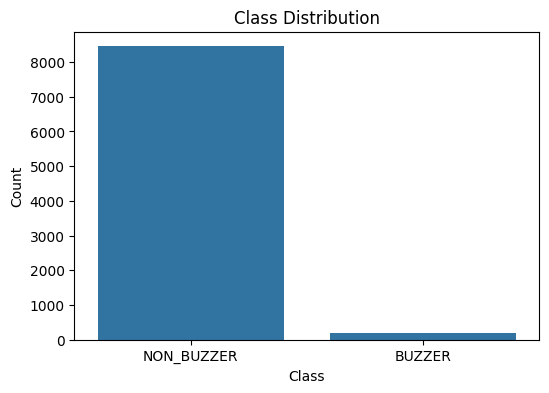

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=labelled_df, x="classification")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
print("Class Distribution:")
labelled_df["classification"].value_counts()

Class Distribution:


,count
classification,
NON_BUZZER,8449
BUZZER,188


The dataset is very imbalance.

## Text Statistics per Class

In [ ]:
def calculate_text_stats(text):
  word_count = len(text.split())
  return word_count

labelled_df["word_count"] = labelled_df["clean_text"].apply(lambda x: calculate_text_stats(x))

statistics_per_class = labelled_df.groupby("classification").agg({
    "word_count": ["mean", "std", "min", "max"]
    }).round(2)

print("Text statistics for each class:")
print(statistics_per_class)

Text statistics for each class:
               word_count                
                     mean    std min  max
classification                           
BUZZER              23.62  29.97   1  192
NON_BUZZER          12.20  16.65   1  370


The statistics show that buzzer comments are generally longer than non-buzzer comments, suggesting word count can be a useful indicator of buzzer activity. However, non-buzzer comments vary widely in length, making them harder to identify based on word count alone.

## Download IndoTwees Stopwords

In [ ]:
!git clone https://github.com/Braincore-id/IndoTWEES.git

Cloning into 'IndoTWEES'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 104 (delta 46), reused 45 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (104/104), 114.16 KiB | 1.04 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [ ]:
indoTwees = pd.read_csv("IndoTWEES/stopwords_twitter.csv")
indoTwees.head()

,33books
0,a thread
1,affh iyyh
2,aja
3,ajah
4,ajg


In [ ]:
tweet_stopwords = indoTwees["33books"].tolist()
tweet_stopwords[:10]

['a thread',
 'affh iyyh',
 'aja',
 'ajah',
 'ajg',
 'alter',
 'an',
 'anjay',
 'anjir',
 'anjrit']

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_stopwords = stopwords.words("indonesian")

combined_stopwords = set(tweet_stopwords) | set(nltk_stopwords)
print(f"Total stopwords: {len(combined_stopwords)}")
list(combined_stopwords)[:20]

Total stopwords: 1035


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['ibarat',
 'sangatlah',
 'sebelum',
 'togelchina',
 'sebisanya',
 'memperkirakan',
 'deh',
 'perlukah',
 'seingat',
 'semuanya',
 'memintakan',
 'ninuninu',
 'lama',
 'akhirnya',
 'misalnya',
 'gaksih',
 'gassin',
 'mengapa',
 'dipersoalkan',
 'tiap']

## N-Gram Analysis

In [ ]:
import re
from collections import Counter

In [ ]:
def get_top_ngrams(text_series, n=1, top_k=10):
  # Join all text
  all_text = " ".join(text_series.astype(str))

  words = re.findall(r"\b[a-z0-9]+\b", all_text.lower())
  word = [word for word in words if word not in combined_stopwords and len(word) > 2]

  if n == 1:
    ngrams = word
  else:
    ngrams = [" ".join(word[i:i+n]) for i in range(len(word)-n+1)]

  ngram_freq = Counter(ngrams)
  return ngram_freq.most_common(top_k)

In [ ]:
class_count = labelled_df["classification"].value_counts()

for n in [1, 2]:
  print(f"\nTop {n}-gram Per Class:")

  for class_name in class_count.index:
    class_text = labelled_df[labelled_df["classification"] == class_name]["clean_text"]
    top_ngrams = get_top_ngrams(class_text, n=n, top_k=10)

    print(f"\n{class_name}")
    for ngram, freq in top_ngrams:
      print(f"{ngram}: {freq}")


Top 1-gram Per Class:

NON_BUZZER
demo: 1842
dpr: 1464
rakyat: 1458
polisi: 986
indonesia: 550
negara: 408
orang: 381
lihat: 328
ojol: 321
allah: 301

BUZZER
demo: 121
objek: 120
vital: 61
terprovokasi: 59
rakyat: 55
rusak: 45
stasiun: 44
dpr: 39
ekonomi: 37
fokus: 35

Top 2-gram Per Class:

NON_BUZZER
demo dpr: 101
anggota dpr: 97
air mata: 97
hati hati: 90
gas air: 88
gedung dpr: 82
rakyat indonesia: 81
adu domba: 73
demo bandara: 72
jalur lambat: 72

BUZZER
demo objek: 60
objek objek: 60
objek vital: 60
tujuan demo: 32
jadikan pelabuhan: 31
pelabuhan bandara: 31
bandara stasiun: 31
sasaran demo: 31
vital rusak: 31
notice jadikan: 30


## Word Cloud

In [ ]:
from wordcloud import WordCloud

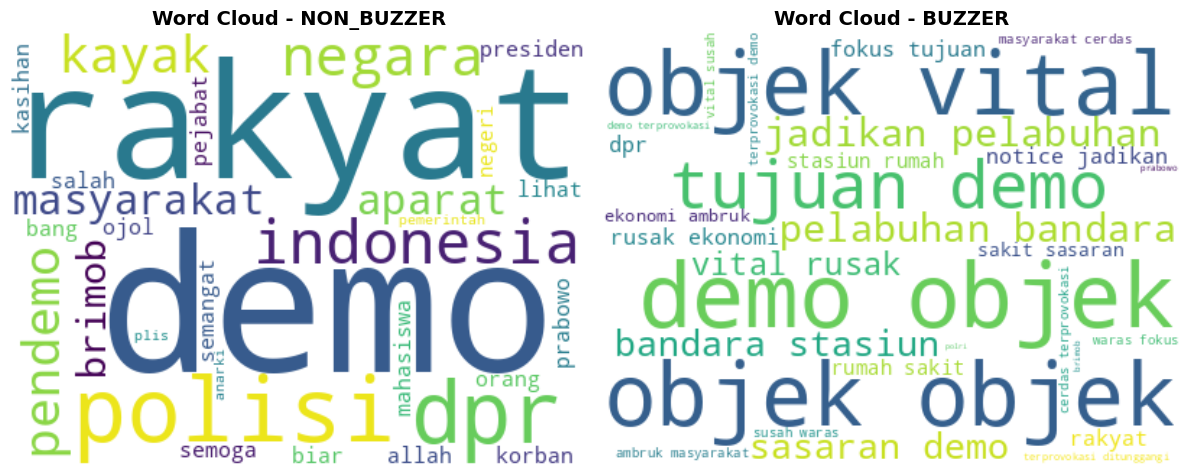

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for idx, class_name in enumerate(class_count.index):
    class_texts = labelled_df[labelled_df["classification"] == class_name]["clean_text"]
    all_text = " ".join(class_texts.dropna().astype(str))

    words = re.findall(r"\b[a-z0-9]+\b", all_text.lower())
    word = [word for word in words if word not in combined_stopwords and len(word) > 2]

    # Buat word cloud
    wordcloud = WordCloud(
        width=400,
        height=300,
        background_color="white",
        max_words=30,
        colormap="viridis"
    ).generate(" ".join(word))

    axes[idx].imshow(wordcloud, interpolation="bilinear")
    axes[idx].set_title(f"Word Cloud - {class_name}", fontsize=14, fontweight="bold")
    axes[idx].axis("off")

plt.tight_layout()
plt.show()

N-Gram and Word Cloud Insight:
1. Buzzer: They frequently use terms like "objek vital", "rusak", "bandara", and "stasiun". This indicates a framing strategy that shifts attention from the protest itself toward narratives about damage to public facilities or state assets.
3. Non-Buzzer: They focus on street conditions, personal safety, and protest targets like the DPR. Common keywords include "ojol", "jalur lambat", "hati hati", "gas air mata", and "DPR". Unlike buzzers with clear framing agendas, organic users talk more about logistics (traffic, ojol movement) and safety risks, using natural everyday language.